In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox

In [62]:

df = pd.read_csv('globalLandTemp.csv')
pd.to_datetime(df['Date'])
df.head(10)

,Date,LandAverageTemperature
0,1753-01-01,2.039
1,1753-02-01,0.715
2,1753-03-01,5.424
3,1753-04-01,8.272
4,1753-05-01,12.186
5,1753-06-01,14.585
6,1753-07-01,15.092
7,1753-08-01,14.148
8,1753-09-01,13.322
9,1753-10-01,8.962


In [63]:
df['LandAverageTemperature'].isnull().values.any()

False

In [64]:
df['Date'].isnull().values.any()

False

In [65]:
train, test = train_test_split(df, test_size=36)

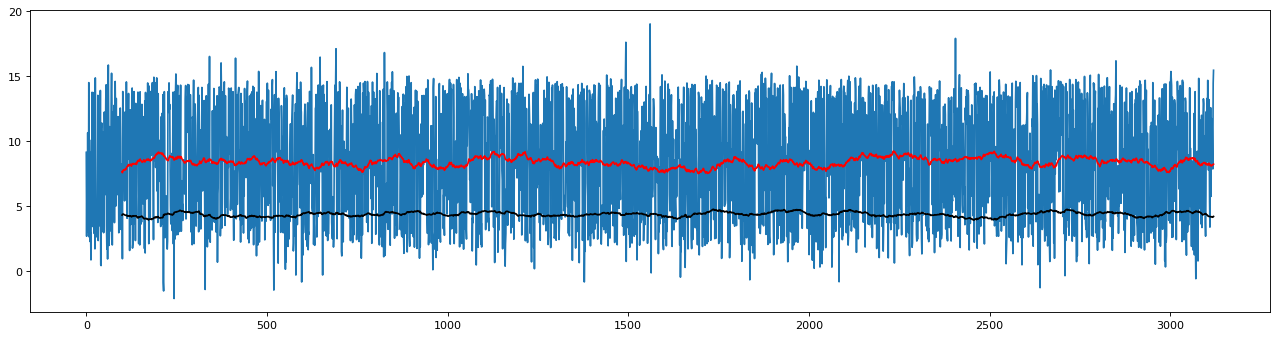

In [66]:
y = train['LandAverageTemperature']
x = np.linspace(0, len(y), len(y))
figure(figsize=(20, 5), dpi=80)
y_mean = y.rolling(100).mean()
y_std = y.rolling(100).std()
plt.plot(x, y)
plt.plot(x, y_mean, color='red')
plt.plot(x, y_std, color='black')

In [67]:
decomp = seasonal_decompose(train)
decomp.plot()

ValueError: could not convert string to float: '2003-04-01'

In [103]:
def box_cox(a, l):
    b = np.add(-np.min(a)+1, a)
    return boxcox(b, lmbda=l)

In [104]:
a =np.array(train['LandAverageTemperature'])
b = np.add(-np.min(a)+1, a)
print(np.min(b))
bctemp,_ = box_cox(np.array(train['LandAverageTemperature']), 0.5)
figure(figsize=(20, 5), dpi=80)
plt.plot(bctemp)

1.0


ValueError: too many values to unpack (expected 2)